# ADS 509 Sentiment Assignment


In [70]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

import seaborn
from nltk.corpus import stopwords

sw = stopwords.words("english")

In [71]:
data_location = "/Users/jvo/DataspellProjects/ads509-sentiment"

lyrics_folder = "lyrics/"
twitter_folder = "twitter/"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

In [72]:
lyrics_dict = {}

for artist_folder in os.listdir(lyrics_folder):
    artist_path = os.path.join(lyrics_folder, artist_folder)
    if os.path.isdir(artist_path):
        songs = []
        for song_file in os.listdir(artist_path):
            if song_file.endswith('.txt'):
                songs.append(song_file)
        lyrics_dict[artist_folder] = songs

In [73]:
cher_path = 'twitter/cher_followers_data.txt'
robyn_path = 'twitter/robynkonichiwa_followers_data.txt'

twitter_dict = {}

def extract_descriptions(file_path):
    df = pd.read_csv(file_path, sep='\t', on_bad_lines='skip')
    descriptions = df['description'].tolist()
    return descriptions

twitter_dict['cher'] = extract_descriptions(cher_path)
twitter_dict['robyn'] = extract_descriptions(robyn_path)

In [76]:
# Cleaned negative/positive words file
input_file_path = 'negative-words.txt'
output_file_path = 'cleaned_negative-words.txt'

with open(input_file_path, 'r') as input_file, open(output_file_path, 'w') as output_file:
    # Skip the first 35 lines
    for _ in range(35):
        next(input_file)

    for line in input_file:
        output_file.write(line)

In [79]:
positive_words = {}
negative_words = {}

# Assign a sentiment score of +1
with open('cleaned_positive-words.txt', 'r') as file:
    positive_words_list = file.read().splitlines()
    for word in positive_words_list:
        positive_words[word] = 1

# Assign a sentiment score of -1
with open('cleaned_negative-words.txt', 'r') as file:
    negative_words_list = file.read().splitlines()
    for word in negative_words_list:
        negative_words[word] = -1

with open(tidy_text_file, 'r') as file:
    for line in file:
        word, sentiment, _ = line.strip().split('\t')
        if sentiment == 'positive':
            positive_words[word] = 1
        elif sentiment == 'negative':
            negative_words[word] = -1

print("Positive Words:")
print(list(positive_words.keys())[:5])

print("Negative Words:")
print(list(negative_words.keys())[:5])

Positive Words:
['a+', 'abound', 'abounds', 'abundance', 'abundant']
Negative Words:
['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable']


## Sentiment Analysis on Songs


In [94]:
sentiment_scores = {}

def calculate_song_sentiment(song_file):
    with open(song_file, 'r') as file:
        song_text = file.read()
        words = song_text.split()
        sentiment = 0
        for word in words:
            if word in positive_words:
                sentiment += positive_words[word]
            elif word in negative_words:
                sentiment += negative_words[word]
        return sentiment

results = []

# iterate through each artist and their songs
for artist, songs in lyrics_dict.items():
    for song in songs:
        song_path = os.path.join('/Users/jvo/DataspellProjects/ads509-sentiment/lyrics/', artist, song)
        song_sentiment = calculate_song_sentiment(song_path)
        results.append((artist, song, song_sentiment))

df = pd.DataFrame(results, columns=["artist", "song", "song_sentiment"])
df = df.sort_values(by=["artist", "song_sentiment"], ascending=[True, False])

In [93]:
cher_df = df[df['artist'] == 'cher']
robyn_df = df[df['artist'] == 'robyn']

cher_avg = cher_df['song_sentiment'].mean()
robyn_avg = robyn_df['song_sentiment'].mean()

print(f'Cher Avg Sentiment: ', cher_avg.round(2))
print(f'Robyn Avg Sentiment: ', robyn_avg.round(2))

Cher Avg Sentiment:  4.64
Robyn Avg Sentiment:  5.94


Q: Overall, which artist has the higher average sentiment per song?

A: Ultimately Robyn had a higher average sentiment. When I looked at the highest song for both artist, Robyn had one specific song that was much higher in sentiment compared to Cher.

In [97]:
print(cher_df.head(3))
print(cher_df.tail(3))

    artist                           song  song_sentiment
104   cher  cher_loveandunderstanding.txt              50
105   cher         cher_ifoundyoulove.txt              49
106   cher            cher_perfection.txt              42
    artist                              song  song_sentiment
417   cher               cher_outrageous.txt             -26
418   cher  cher_iwalkonguildedsplinters.txt             -26
419   cher                 cher_bangbang.txt             -42


In [98]:
print(robyn_df.head(3))
print(robyn_df.tail(3))

  artist                              song  song_sentiment
0  robyn              robyn_loveisfree.txt              85
1  robyn  robyn_wedancetothebeat114528.txt              65
2  robyn        robyn_wedancetothebeat.txt              65
    artist                                       song  song_sentiment
101  robyn                   robyn_criminalintent.txt             -45
102  robyn        robyn_dontfuckingtellmewhattodo.txt             -94
103  robyn  robyn_dontfuckingtellmewhattodo114520.txt             -94


Q: For your first/second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score?

A: The lyrics were printed off-screen to save on space. However just looking at the initial song titles, it shows a clear sentiment towards positive and negative respectively. Words such as "found", "perfection", and "love" are very positive while songs such as Bang Bang use "shot", "down", and "awful".

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

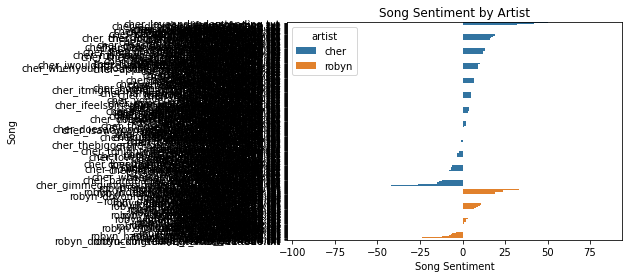

In [105]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.barplot(x='song_sentiment', y='song', hue='artist', data=df)
plt.title('Song Sentiment by Artist')
plt.xlabel('Song Sentiment')
plt.ylabel('Song')
plt.show()

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.

## Sentiment Analysis on Twitter Descriptions

In [119]:
sentiment_scores = {}

def calculate_text_sentiment(text):
    words = text.split()
    sentiment = 0
    for word in words:
        if word in positive_words:
            sentiment += positive_words[word]
        elif word in negative_words:
            sentiment += negative_words[word]
    return sentiment

results = []

# Iterate through each artist and their text descriptions in twitter_dict
for artist, descriptions in twitter_dict.items():
    for description in descriptions:
        if not pd.isna(description):
            description_sentiment = calculate_text_sentiment(description)
            results.append((artist, description, description_sentiment))

df = pd.DataFrame(results, columns=["artist", "description", "sentiment"])
df = df.sort_values(by=["artist", "sentiment"], ascending=[True, False])

In [120]:
cher_df = df[df['artist'] == 'cher']
robyn_df = df[df['artist'] == 'robyn']

cher_avg = cher_df['sentiment'].mean()
robyn_avg = robyn_df['sentiment'].mean()

print(f'Cher Avg Sentiment: ', cher_avg.round(2))
print(f'Robyn Avg Sentiment: ', robyn_avg.round(2))

Cher Avg Sentiment:  0.4
Robyn Avg Sentiment:  0.31


Q: What is the average sentiment of your two artists? 

A: The average sentiment was 0.4 for Cher and 0.31 for Robyn. This is an interesting switch since Robyn had a higher sentiment in terms of songs but their followers are generally less positive compared to Cher's followers.